In [1]:
#important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from torchvision import datasets,models,transforms
import torch
from torch import optim,nn
from collections import OrderedDict

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#let us get the dataset
!wget http://cb.lk/covid_19 # from coding blocks 
!unzip covid_19 #unzipping

--2020-05-05 03:15:03--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-05-05 03:15:03--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-05-05 03:15:05--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-05-05 03:15:05--  https://www.dropbox.com/s/raw/7

In [0]:
data_dir = '/content/CovidDataset'
train_dir = data_dir + '/Train'
val_dir = data_dir+'/Val'

In [0]:
train_transform = transforms.Compose([transforms.RandomRotation(30),
                                      transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
                                      ])
val_transform = transforms.Compose([transforms.Resize(255),
                                   transforms.CenterCrop(224),
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
                                   ])

In [0]:
train_dataset = datasets.ImageFolder(train_dir,transform = train_transform) 
val_dataset = datasets.ImageFolder(val_dir,transform = val_transform)


In [0]:
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=32,shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset,batch_size=32,shuffle=True)

In [7]:
model = models.densenet161(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/checkpoints/densenet161-8d451a50.pth


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [0]:
for params in model.parameters():
  params.require_grad = False
classifier = nn.Sequential(OrderedDict([
                                      ('fc1',nn.Linear(2208,1024,bias=True)),
                                      ('relu',nn.ReLU()),
                                      ('dropout',nn.Dropout(p=0.2)),
                                      ('fc2',nn.Linear(1024,512,bias=True)),
                                      ('relu',nn.ReLU()),
                                      ('dropout',nn.Dropout(p=0.2)),
                                      ('fc3',nn.Linear(512,256,bias=True)),
                                      ('relu',nn.ReLU()),
                                      ('dropout',nn.Dropout(p=0.2)),
                                      ('fc4',nn.Linear(256,128,bias=True)),
                                      ('relu',nn.ReLU()),
                                      ('dropout',nn.Dropout(p=0.2)),
                                      ('fc5',nn.Linear(128,64,bias=True)),
                                      ('relu',nn.ReLU()),
                                      ('dropout',nn.Dropout(p=0.2)),
                                      ('fc6',nn.Linear(64,32,bias=True)),
                                      ('relu',nn.ReLU()),
                                      ('dropout',nn.Dropout(p=0.2)),
                                      ('fc7',nn.Linear(32,16,bias=True)),
                                      ('relu',nn.ReLU()),
                                      ('dropout',nn.Dropout(p=0.2)),
                                      ('fc8',nn.Linear(16,8,bias=True)),
                                      ('relu',nn.ReLU()),
                                      ('dropout',nn.Dropout(p=0.2)),
                                      ('fc9',nn.Linear(8,4,bias=True)),
                                      ('relu',nn.ReLU()),
                                      ('dropout',nn.Dropout(p=0.2)),    
                                      ('fc10',nn.Linear(4,2,bias=True)),
                                      ('relu',nn.ReLU()),
                                      ('dropout',nn.Dropout(p=0.2)),
                                      ('output',nn.LogSoftmax(dim=1))                                      
]))
model.classifier = classifier
for params in model.classifier.parameters():
  params.require_grad = True 

In [0]:
optimizer = optim.Adam(model.classifier.parameters(),lr=0.001)
criterion =  nn.NLLLoss()

In [10]:
epochs = 20
train_losses =[ ]
val_losses = []
accuracy = 0
for e in range(epochs):
    running_loss = 0
    accuracy_train = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy_train += torch.mean(equals.type(torch.FloatTensor))
        running_loss += loss.item()
        train_losses.append(running_loss/len(train_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),                                                     
              "Train Accuracy: {:.3f}".format(accuracy_train/len(train_loader))
              )

Epoch: 1/20..  Training Loss: 0.102..  Train Accuracy: 0.067
Epoch: 1/20..  Training Loss: 0.202..  Train Accuracy: 0.129
Epoch: 1/20..  Training Loss: 0.301..  Train Accuracy: 0.201
Epoch: 1/20..  Training Loss: 0.397..  Train Accuracy: 0.317
Epoch: 1/20..  Training Loss: 0.486..  Train Accuracy: 0.451
Epoch: 1/20..  Training Loss: 0.565..  Train Accuracy: 0.589
Epoch: 1/20..  Training Loss: 0.628..  Train Accuracy: 0.723
Epoch: 2/20..  Training Loss: 0.029..  Train Accuracy: 0.143
Epoch: 2/20..  Training Loss: 0.183..  Train Accuracy: 0.205
Epoch: 2/20..  Training Loss: 0.195..  Train Accuracy: 0.348
Epoch: 2/20..  Training Loss: 0.228..  Train Accuracy: 0.482
Epoch: 2/20..  Training Loss: 0.343..  Train Accuracy: 0.554
Epoch: 2/20..  Training Loss: 0.386..  Train Accuracy: 0.670
Epoch: 2/20..  Training Loss: 0.403..  Train Accuracy: 0.812
Epoch: 3/20..  Training Loss: 0.017..  Train Accuracy: 0.143
Epoch: 3/20..  Training Loss: 0.065..  Train Accuracy: 0.263
Epoch: 3/20..  Training 

In [13]:
validloss = []
runningloss = 0
accuracy = 0
with torch.no_grad():
    for images , labels in val_loader:
        logps = model(images)
        loss = criterion(logps,labels)
        runningloss  =  runningloss+loss.item()
        validloss.append(runningloss/len(val_loader))
        top_p, top_class = logps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))        
    print("validation accuracy :" , accuracy/len(val_loader))

validation accuracy : tensor(0.9821)


In [0]:
model.name = 'densenet161'
checkpoint = {
            'architecture': model.name,
            'classifier': model.classifier,
            'state_dict': model.state_dict()}

torch.save(checkpoint, '/content/CovidDataset/Checkpoint.pth')

In [0]:
def load_checkpoint(path):
    """
    Loads deep learning model checkpoint.
    """
    checkpoint = torch.load(path)
    model = models.densenet161(pretrained=True);
    for param in model.parameters(): 
        param.requires_grad = False
    model.classifier = checkpoint['classifier']
    model.load_state_dict = checkpoint['state_dict']
    return model
model = load_checkpoint('/content/CovidDataset/Checkpoint.pth')

In [18]:
model.state_dict()

OrderedDict([('features.conv0.weight',
              tensor([[[[-8.5424e-02, -1.7790e-01, -2.1918e-01,  ..., -2.1247e-01,
                         -1.7470e-01, -1.2502e-01],
                        [-1.1271e-01, -1.8076e-01, -2.1979e-01,  ..., -2.1800e-01,
                         -1.7365e-01, -1.2895e-01],
                        [-6.4315e-02, -1.2065e-01, -1.4375e-01,  ..., -1.3209e-01,
                         -1.2739e-01, -1.0395e-01],
                        ...,
                        [ 6.3051e-02,  7.7100e-02,  9.9101e-02,  ...,  1.1232e-01,
                          1.0000e-01,  8.9417e-02],
                        [ 1.1722e-01,  1.4742e-01,  1.6682e-01,  ...,  1.9763e-01,
                          1.6559e-01,  1.2685e-01],
                        [ 1.2721e-01,  2.0482e-01,  2.4749e-01,  ...,  2.5828e-01,
                          2.0106e-01,  1.6552e-01]],
              
                       [[-1.4774e-01, -2.3783e-01, -2.9080e-01,  ..., -3.0434e-01,
                       

In [0]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    img = Image.open(image)
    img_r = img.resize((255,255))
    l = (255 - 224)/2
    t = (255-224)/2
    r = (255 + 224)/2
    b = (255+224)/2
    img_c  = img_r.crop((l,t,r,b))
    np_image = np.array(img_c)
    np_image  = np_image/ 255
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    new_np_image = (np_image - mean)/std
    fin_img = new_np_image.transpose((2,0,1))
    return fin_img



In [0]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

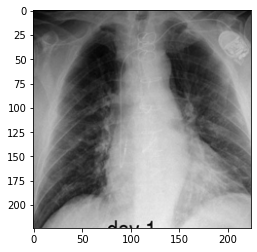

In [23]:
from PIL import Image
testimage = '/content/CovidDataset/Val/Covid/4-x-day1.jpg'
image = process_image(testimage)
imshow(image)

In [0]:
def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    pytorch_np_image = process_image(image_path)
    #Convert numpy into tensor
    pytorch_tensor = torch.tensor(pytorch_np_image)
    pytorch_tensor = pytorch_tensor.float()
    #ERROR!!
    pytorch_tensor = pytorch_tensor.unsqueeze(0)
    model.eval()
    #AGAIN ERROR !!
    model.to('cpu')
    LogSoftmax_predictions = model.forward(pytorch_tensor)
    predictions = torch.exp(LogSoftmax_predictions)
    top_preds, top_labs = predictions.topk(2)
    top_preds = top_preds.detach().numpy().tolist()
    top_labs = top_labs.tolist()
    labels = pd.DataFrame({'Classes':pd.Series(['Covid','Normal']) })
    labels = labels.set_index('Classes')
    labels = labels.iloc[top_labs[0]]
    labels['Predictions'] = top_preds[0]
    return labels

In [27]:

image_path = '/content/CovidDataset/Val/Covid/4-x-day1.jpg'
predict(image_path,model)

,Predictions
Classes,
Covid,0.936933
Normal,0.063067
